In [194]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.inspection import permutation_importance

import shap

%matplotlib inline

# Task 1.1 Провести EDA на своих данных

В рамках данного пункта необходимо провести предварительный разведочный анализ своего набора данных.

Критерии оценки:

- Рассмотрены базовые характеристики/статистики для набора данных - 2б.

- Реализованы наиболее релевантные визуализации - 4б.

- По ходу работы присутствуют комментарии (вы, как эксперт в предметной области, можете проинтерпретировать полученные результаты анализа, сделав выводы о том, каким образом лучше работать с набором данных в будущем, какие могут возникнуть проблемы, какую предобработку целесообразно сделать и тп). - 4б.

## Data intro

MyAnimeList Anime dataset

In [195]:
path = '../../data/project/anime.csv'
data = pd.read_csv(path)
data.head()

anime_id                               title   type  score  scored_by  \
0      5114    Fullmetal Alchemist: Brotherhood     tv   9.10    2037075   
1     11061              Hunter x Hunter (2011)     tv   9.04    1671587   
2     38524  Shingeki no Kyojin Season 3 Part 2     tv   9.05    1491491   
3      9253                         Steins;Gate     tv   9.07    1348232   
4     28851                      Koe no Katachi  movie   8.94    1540277   

            status  episodes  start_date    end_date        source  ...  \
0  finished_airing      64.0  2009-04-05  2010-07-04         manga  ...   
1  finished_airing     148.0  2011-10-02  2014-09-24         manga  ...   
2  finished_airing      10.0  2019-04-29  2019-07-01         manga  ...   
3  finished_airing      24.0  2011-04-06  2011-09-14  visual_novel  ...   
4  finished_airing       1.0  2016-09-17  2016-09-17         manga  ...   

                                           producers  \
0  ['Aniplex', 'Square Enix', 'Mainichi Broadcast...   
1   ['VAP', 'Nippon Television Network', 'Shueisha']   
2  ['Production I.G', 'Dentsu', 'Mainichi Broadca...   
3  ['Frontier Works', 'Media Factory', 'Kadokawa ...   
4  ['Shochiku', 'Pony Canyon', 'Kodansha', 'ABC A...   

                              licensors  \
0  ['Funimation', 'Aniplex of America']   
1                         ['VIZ Media']   
2                        ['Funimation']   
3                        ['Funimation']   
4          ['Eleven Arts', 'NYAV Post']   

                                            synopsis  \
0  After a horrific alchemy experiment goes wrong...   
1  Hunters devote themselves to accomplishing haz...   
2  Seeking to restore humanity's diminishing hope...   
3  Eccentric scientist Rintarou Okabe has a never...   
4  As a wild youth, elementary school student Sho...   

                                          background  \
0                                                NaN   
1                                                NaN   
2  Shingeki no Kyojin adapts content from volumes...   
3  Steins;Gate is based on 5pb. and Nitroplus' vi...   
4  Koe no Katachi won the following awards: Japan...   

                                        main_picture  \
0  https://cdn.myanimelist.net/images/anime/1208/...   
1  https://cdn.myanimelist.net/images/anime/1337/...   
2  https://cdn.myanimelist.net/images/anime/1517/...   
3  https://cdn.myanimelist.net/images/anime/1935/...   
4  https://cdn.myanimelist.net/images/anime/1122/...   

                                                 url  \
0  https://myanimelist.net/anime/5114/Fullmetal_A...   
1  https://myanimelist.net/anime/11061/Hunter_x_H...   
2  https://myanimelist.net/anime/38524/Shingeki_n...   
3     https://myanimelist.net/anime/9253/Steins_Gate   
4  https://myanimelist.net/anime/28851/Koe_no_Kat...   

                                   trailer_url  \
0  https://www.youtube.com/watch?v=--IcmZkvL0Q   
1  https://www.youtube.com/watch?v=D9iTQRB4XRk   
2  https://www.youtube.com/watch?v=hKHepjfj5Tw   
3  https://www.youtube.com/watch?v=27OZc-ku6is   
4  https://www.youtube.com/watch?v=XBNWo25izJ8   

                      title_english              title_japanese  \
0  Fullmetal Alchemist: Brotherhood  鋼の錬金術師 FULLMETAL ALCHEMIST   
1                   Hunter x Hunter    HUNTER×HUNTER（ハンター×ハンター）   
2   Attack on Titan Season 3 Part 2        進撃の巨人 Season3 Part.2   
3                       Steins;Gate                 STEINS;GATE   
4                    A Silent Voice                         聲の形   

                                      title_synonyms  
0  ['Hagane no Renkinjutsushi: Fullmetal Alchemis...  
1                                     ['HxH (2011)']  
2                                                 []  
3                                                 []  
4                             ['The Shape of Voice']  

[5 rows x 39 columns]

In [196]:
data.columns

Index(['anime_id', 'title', 'type', 'score', 'scored_by', 'status', 'episodes',
       'start_date', 'end_date', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'sfw', 'approved',
       'created_at', 'updated_at', 'start_year', 'start_season',
       'real_start_date', 'real_end_date', 'broadcast_day', 'broadcast_time',
       'genres', 'themes', 'demographics', 'studios', 'producers', 'licensors',
       'synopsis', 'background', 'main_picture', 'url', 'trailer_url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')

In [197]:
# Выбор интересующих столбцов
anime_df = data[['type', 'score', 'scored_by', 'episodes', 'source', 'members', 
                 'favorites', 'episode_duration', 'rating', 'start_year', 'start_season']]

In [198]:
anime_df.shape

(24985, 11)

In [199]:
anime_df.dtypes

type                 object
score               float64
scored_by             int64
episodes            float64
source               object
members               int64
favorites             int64
episode_duration     object
rating               object
start_year          float64
start_season         object
dtype: object

In [200]:
anime_df.isna().sum()

type                  58
score               8935
scored_by              0
episodes             547
source              3561
members                0
favorites              0
episode_duration     598
rating               580
start_year          4684
start_season        4684
dtype: int64

In [201]:
anime_df = anime_df.copy().dropna()

target: Score

## Numerical columns

In [202]:
# convert episode duration into minutes
anime_df.episode_duration = pd.to_timedelta(anime_df.episode_duration).dt.total_seconds()/60
anime_df.episode_duration[1]

23.616666666666667

In [203]:
num_cols = anime_df.select_dtypes(exclude='object')
num_cols.shape

(13577, 7)

In [204]:
num_cols.describe()

score     scored_by      episodes       members      favorites  \
count  13577.000000  1.357700e+04  13577.000000  1.357700e+04   13577.000000   
mean       6.525605  3.495160e+04     11.074096  6.791969e+04     784.060396   
std        0.877088  1.260883e+05     42.762575  2.091136e+05    5668.551945   
min        1.850000  1.000000e+02      1.000000  1.800000e+02       0.000000   
25%        5.920000  5.340000e+02      1.000000  1.629000e+03       2.000000   
50%        6.530000  2.521000e+03      2.000000  6.775000e+03      12.000000   
75%        7.160000  1.543300e+04     12.000000  3.754400e+04      90.000000   
max        9.100000  2.685033e+06   3057.000000  3.779820e+06  219036.000000   

       episode_duration    start_year  
count      13577.000000  13577.000000  
mean          24.933569   2009.345658  
std           25.103605     12.471154  
min            0.100000   1917.000000  
25%            5.433333   2005.000000  
50%           23.666667   2013.000000  
75%           26.083333   2018.000000  
max          168.016667   2023.000000

## Categorical columns

In [205]:
cat_cols = anime_df.select_dtypes(include='object')
cat_cols.head()

type        source rating start_season
0     tv         manga      r       spring
1     tv         manga  pg_13         fall
2     tv         manga      r       spring
3     tv  visual_novel  pg_13       spring
4  movie         manga  pg_13       summer

In [206]:
cat_cols.shape

(13577, 4)

In [207]:
cat_cols.describe()

type    source rating start_season
count   13577     13577  13577        13577
unique      6        16      6            4
top        tv  original  pg_13         fall
freq     4152      4182   6531         3718

## Scatterplots with target

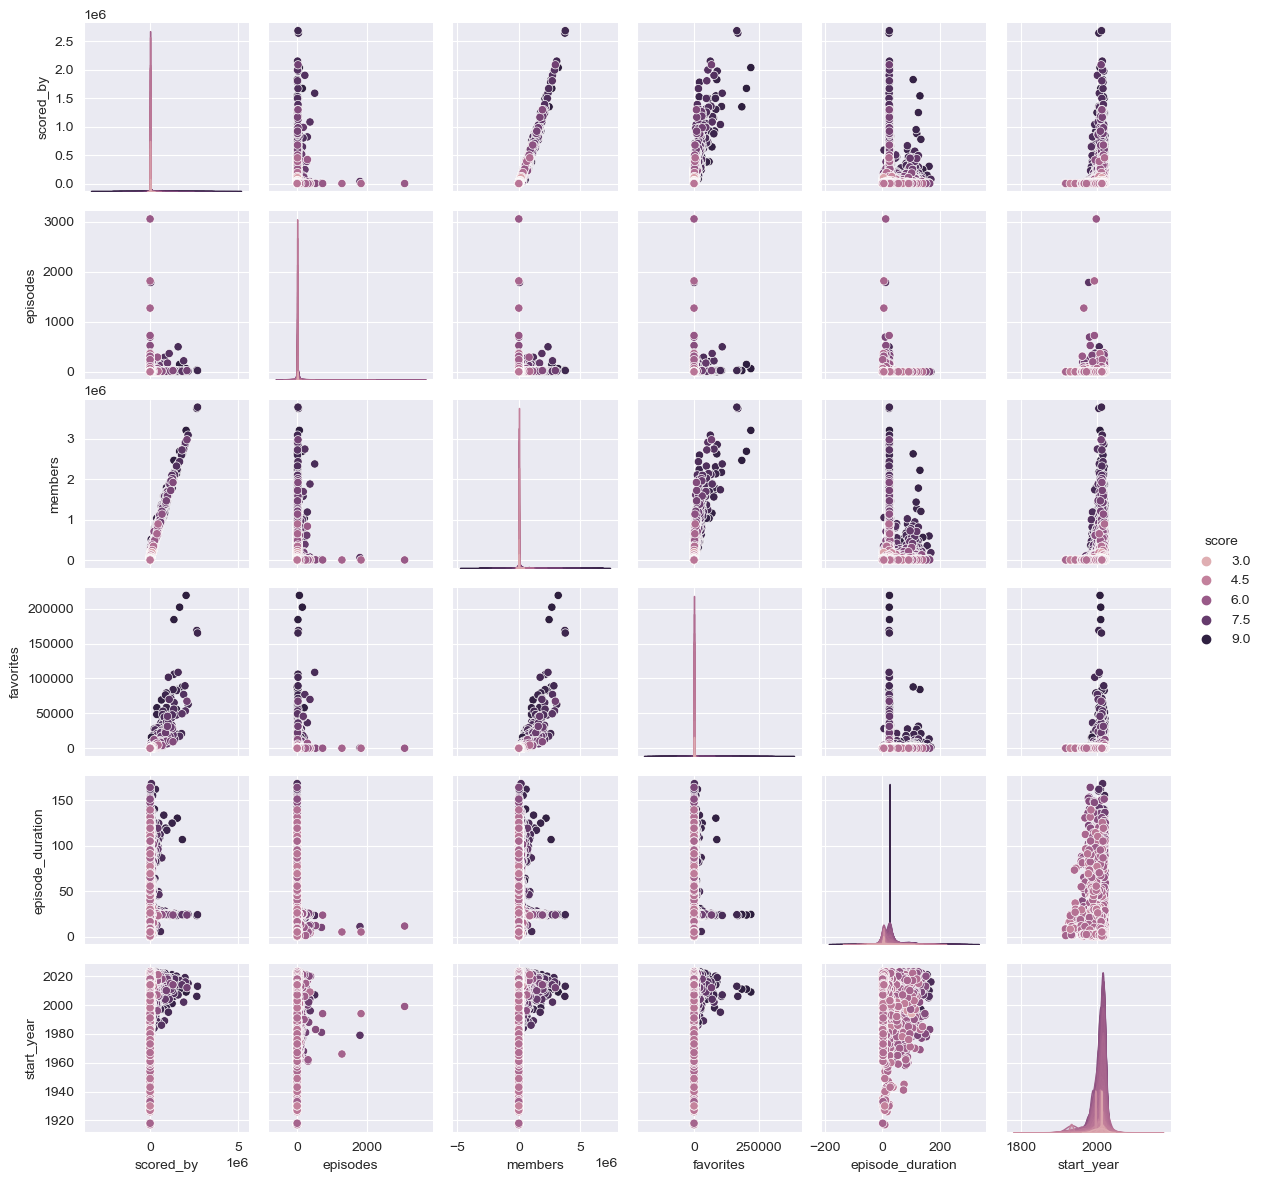

In [208]:
sns.pairplot(anime_df, hue="score", height=2.0, aspect=1.0)

Наблюдаются зависимости между параметрами members, scored_by, favourites и score.
Members - количество людей, которые сохранили tittle в свой список
Scored_by - количество людей, которые оценили tittle
Favourites - количество людей, которые сохранили tittle в свой список избранного
Можно предположить, что популярность tittle и его оценка взаимосвязаны
Также видно, что чем старше tittle, тем меньше у него популярность и оценка

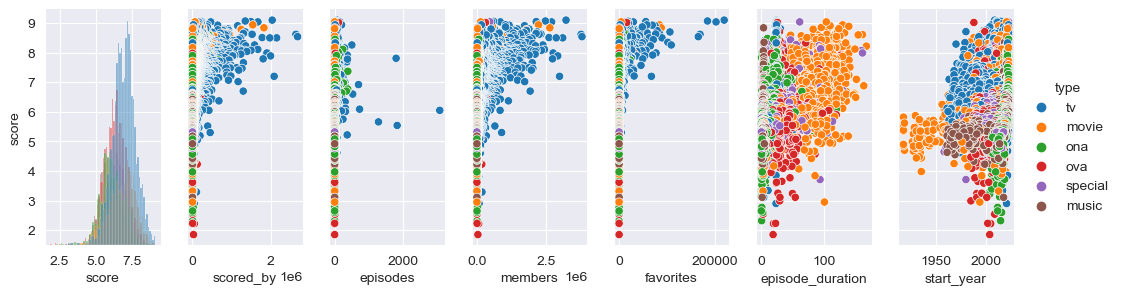

In [209]:
x_vars = num_cols.columns
y_vars = ["score"]
g = sns.PairGrid(anime_df, hue="type", x_vars=x_vars, y_vars=y_vars, height=3, aspect=0.5)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

1. Тип tv (сериал) в среднем получает более высокие оценки
2. Чем выше оценка, тем большее количество людей оценили title
3. До 1950х выпускали только тип movie

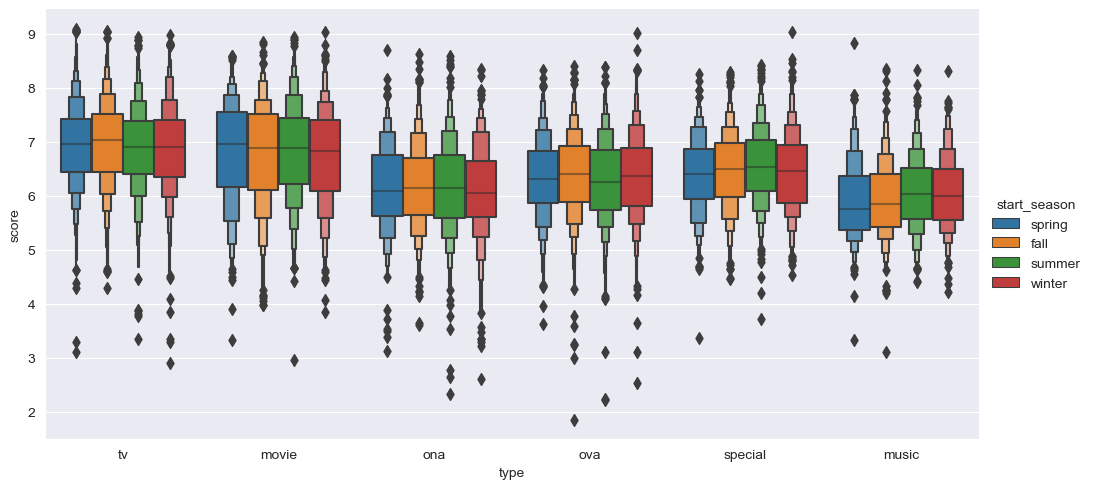

In [210]:
sns.catplot(data=anime_df, x="type", y="score", hue="start_season", kind="boxen", height=5, aspect=2.0)

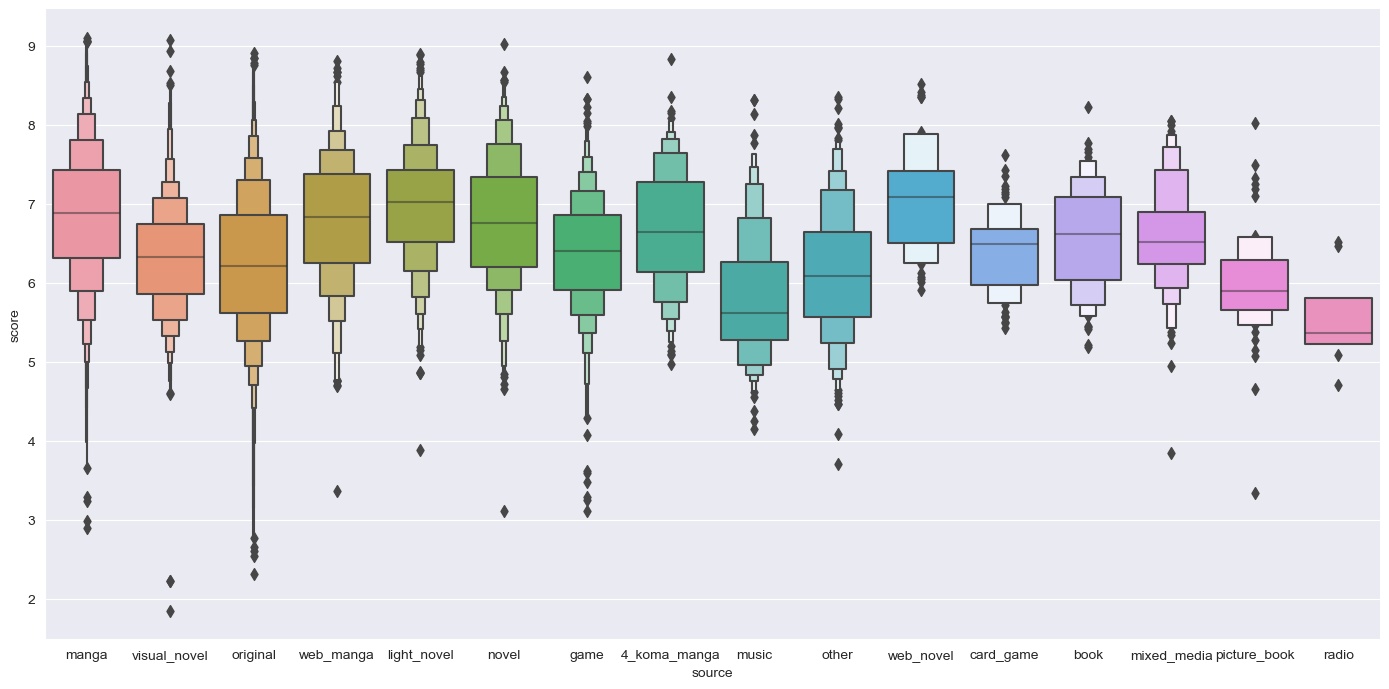

In [211]:
sns.catplot(data=anime_df, x="source", y="score", kind="boxen", height=7, aspect=2.0)

Text(0.5, 1.0, 'Source Pie Chart')

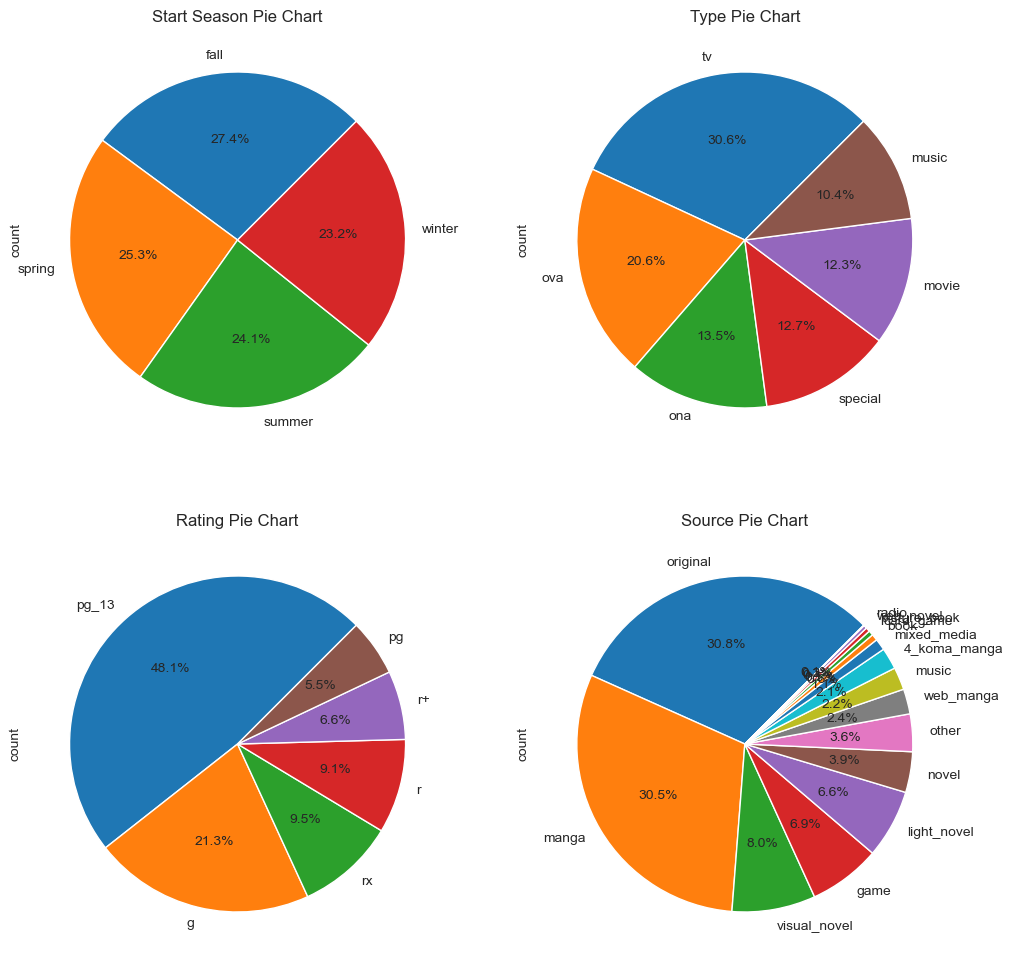

In [212]:
_, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
anime_df['start_season'].value_counts().plot(kind="pie",
                                             subplots=True,
                                             ax=axes[0,0],
                                             autopct='%1.1f%%', 
                                             startangle=45)
axes[0,0].set_title("Start Season Pie Chart")
anime_df['type'].value_counts().plot(subplots=True,
                                     kind="pie",
                                     ax=axes[0,1],
                                     autopct='%1.1f%%',
                                     startangle=45)
axes[0,1].set_title("Type Pie Chart")
anime_df['rating'].value_counts().plot(subplots=True,
                                     kind="pie",
                                     ax=axes[1,0],
                                     autopct='%1.1f%%',
                                     startangle=45)
axes[1,0].set_title("Rating Pie Chart")
anime_df['source'].value_counts().plot(subplots=True,
                                     kind="pie",
                                     ax=axes[1,1],
                                     autopct='%1.1f%%',
                                     startangle=45)
axes[1,1].set_title("Source Pie Chart")

## Outliers

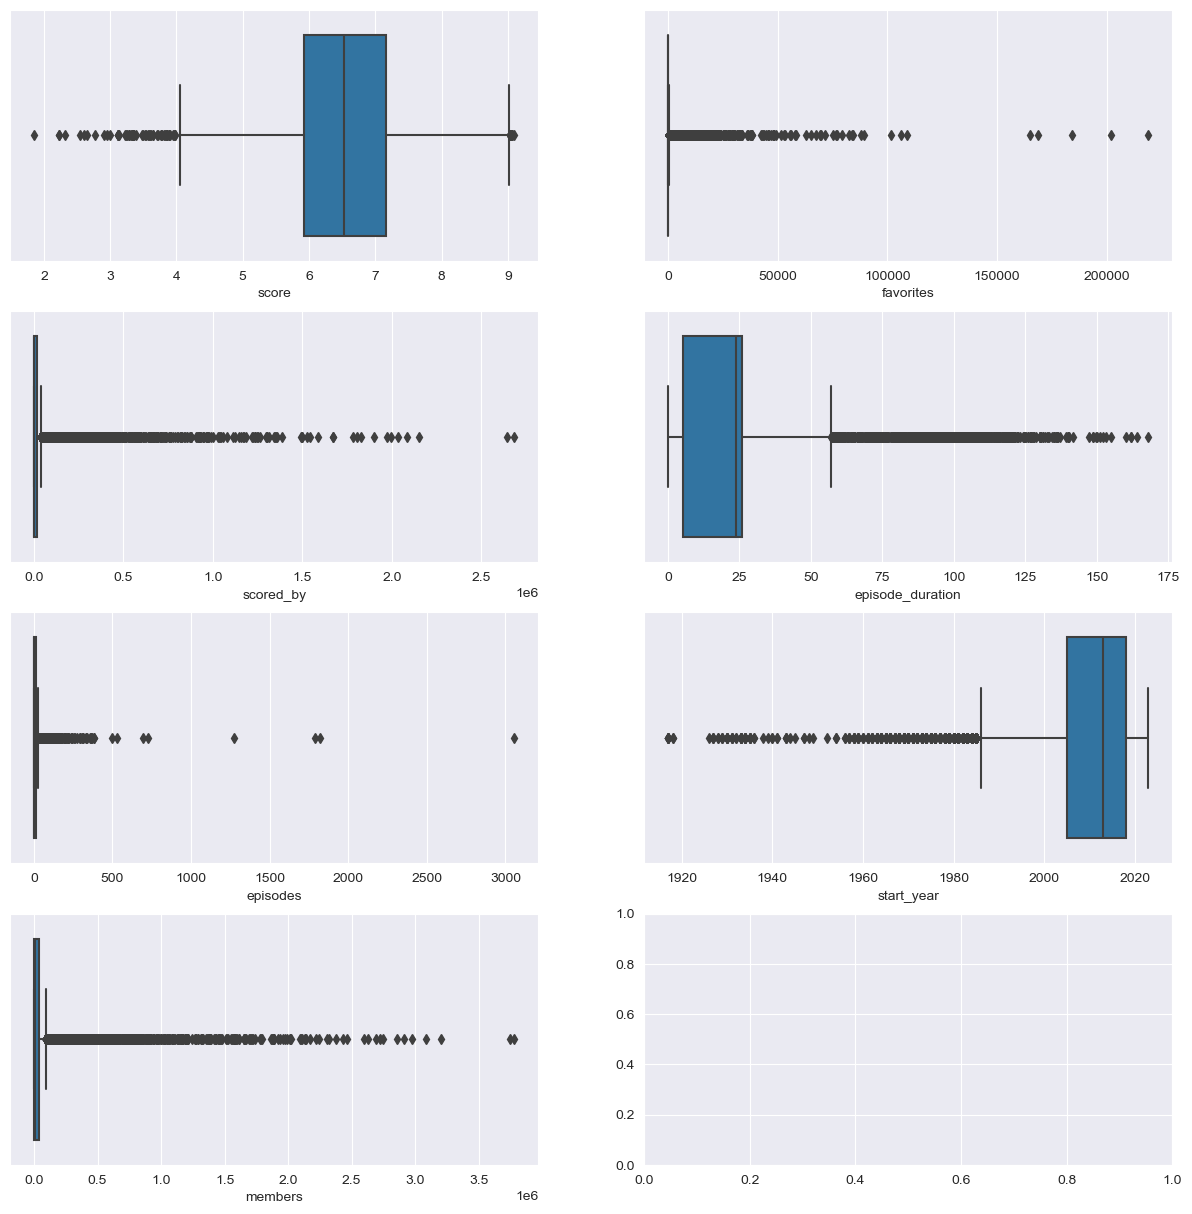

In [213]:
_, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
for idx, feature in enumerate(num_cols.columns):
    sns.boxplot(x=anime_df[feature], ax=axes[idx % 4, idx // 4])

## Distibutions of num features

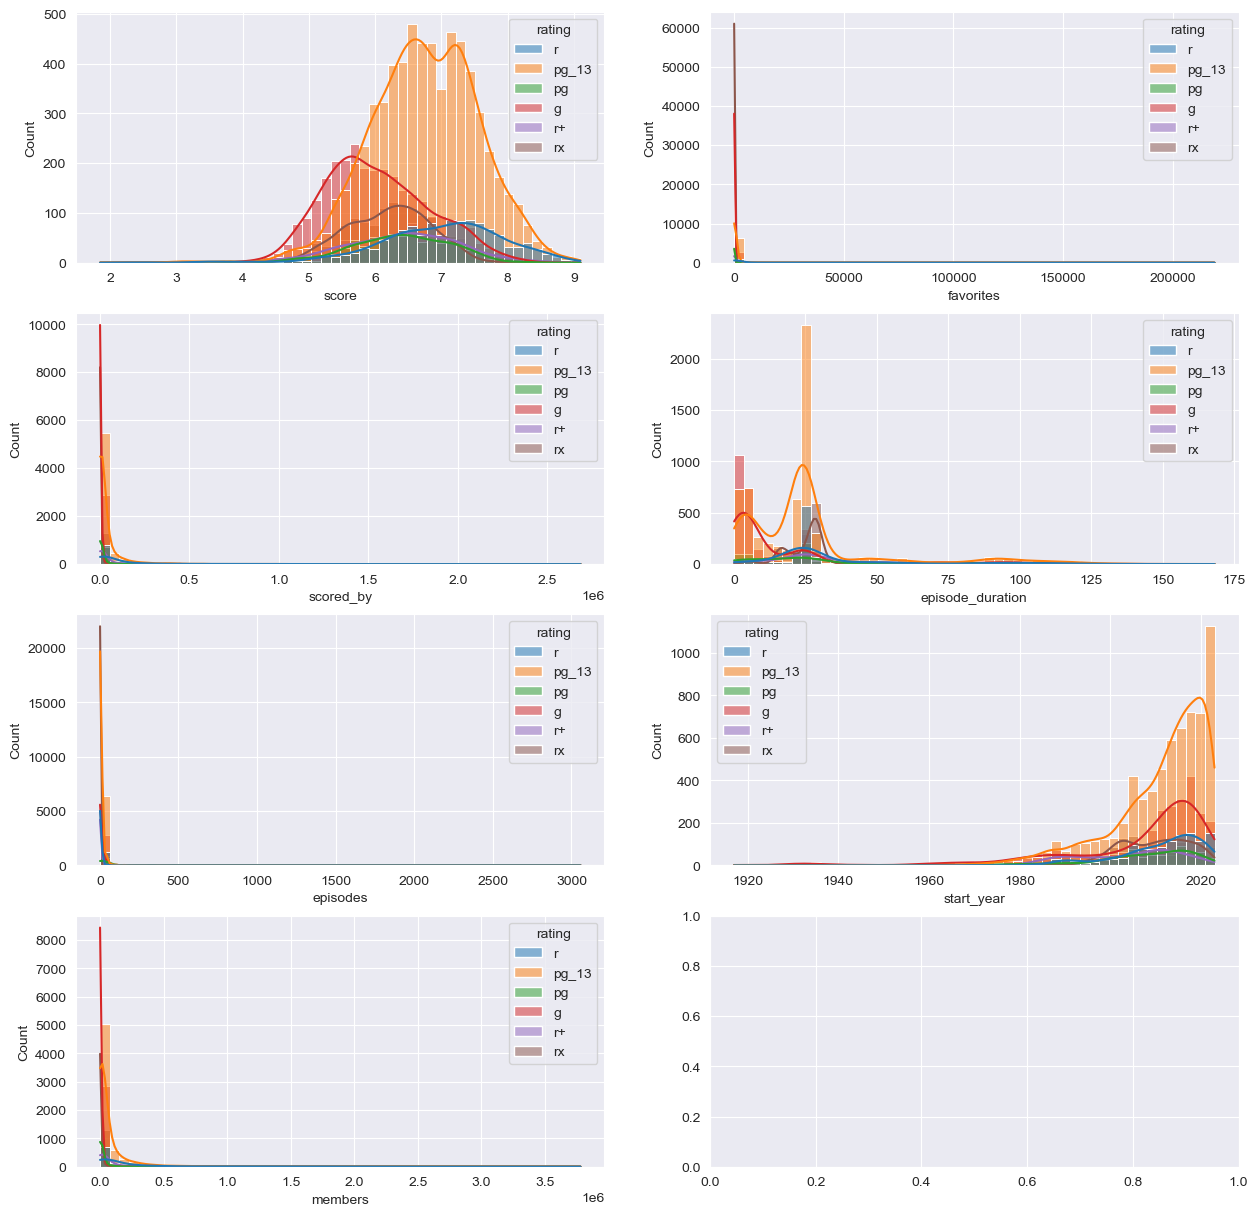

In [214]:
_, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
for idx, feature in enumerate(num_cols.columns):
    sns.histplot(data=anime_df,
                 x=feature,
                bins=50,
                kde = True,
                hue = "rating",
                ax=axes[idx % 4, idx // 4])

## Correlation matrix

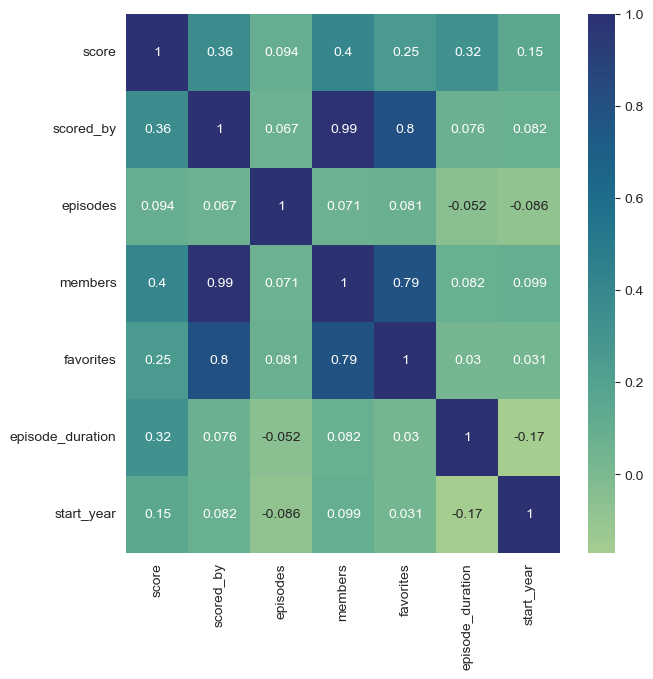

In [215]:
plt.figure(figsize=(7,7))
sns.heatmap(num_cols.corr(), annot=True, cmap="crest");

1. Зависимость score от episode_duration можно объяснить зависимостью episode_duration от типа произведения.
Тип tv преобладает по количеству и получает более высокие оценки.
2. Зависимость score от start_year возникает из-за низкой популярности ранних работ

# Task 1.2 Выбрать и обосновать метрику для измерения качества.

В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения).
Критерии оценки:
- Предложена метрика - 5б.
- Присутствует корректное обоснование - 5б.

MAPE выбрана в качестве метрики.
В целевой переменной есть выбросы, поэтому лучше использовать абсолютную ошибку.
Для простоты оценки качества модели выбрана относительная величина.

# Task 1.3 Построить и оценить качество бейзлайна

В рамках данного пункта необходимо выбрать и обучить бейзлайн-модель, а также измерить ее качество.
Критерии оценки:
- Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - 3б.
- Бейзлайновая модель обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 5б.
- Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 2б.

## Кодирование категориальных переменных

In [216]:
res = pd.get_dummies(anime_df.start_season, prefix='season', drop_first=True)
res = res.join(pd.get_dummies(anime_df.source, prefix='source', drop_first=True))
res = res.join(pd.get_dummies(anime_df.type, prefix='type', drop_first=True))
res = res.join(pd.get_dummies(anime_df.rating, prefix='rating', drop_first=True))
res.head()

season_spring  season_summer  season_winter  source_book  source_card_game  \
0           True          False          False        False             False   
1          False          False          False        False             False   
2           True          False          False        False             False   
3           True          False          False        False             False   
4          False           True          False        False             False   

   source_game  source_light_novel  source_manga  source_mixed_media  \
0        False               False          True               False   
1        False               False          True               False   
2        False               False          True               False   
3        False               False         False               False   
4        False               False          True               False   

   source_music  ...  type_music  type_ona  type_ova  type_special  type_tv  \
0         False  ...       False     False     False         False     True   
1         False  ...       False     False     False         False     True   
2         False  ...       False     False     False         False     True   
3         False  ...       False     False     False         False     True   
4         False  ...       False     False     False         False    False   

   rating_pg  rating_pg_13  rating_r  rating_r+  rating_rx  
0      False         False      True      False      False  
1      False          True     False      False      False  
2      False         False      True      False      False  
3      False          True     False      False      False  
4      False          True     False      False      False  

[5 rows x 28 columns]

In [217]:
data = pd.concat([anime_df, res], axis=1).drop(columns=['start_season', 'source', 'type', 'rating'])
data.head()

score  scored_by  episodes  members  favorites  episode_duration  \
0   9.10    2037075      64.0  3206028     219036         24.333333   
1   9.04    1671587     148.0  2688079     202109         23.616667   
2   9.05    1491491      10.0  2133927      55644         23.916667   
3   9.07    1348232      24.0  2463954     184312         24.333333   
4   8.94    1540277       1.0  2218467      84124        130.050000   

   start_year  season_spring  season_summer  season_winter  ...  type_music  \
0      2009.0           True          False          False  ...       False   
1      2011.0          False          False          False  ...       False   
2      2019.0           True          False          False  ...       False   
3      2011.0           True          False          False  ...       False   
4      2016.0          False           True          False  ...       False   

   type_ona  type_ova  type_special  type_tv  rating_pg  rating_pg_13  \
0     False     False         False     True      False         False   
1     False     False         False     True      False          True   
2     False     False         False     True      False         False   
3     False     False         False     True      False          True   
4     False     False         False    False      False          True   

   rating_r  rating_r+  rating_rx  
0      True      False      False  
1     False      False      False  
2      True      False      False  
3     False      False      False  
4     False      False      False  

[5 rows x 35 columns]

## Мультиколлинеарность

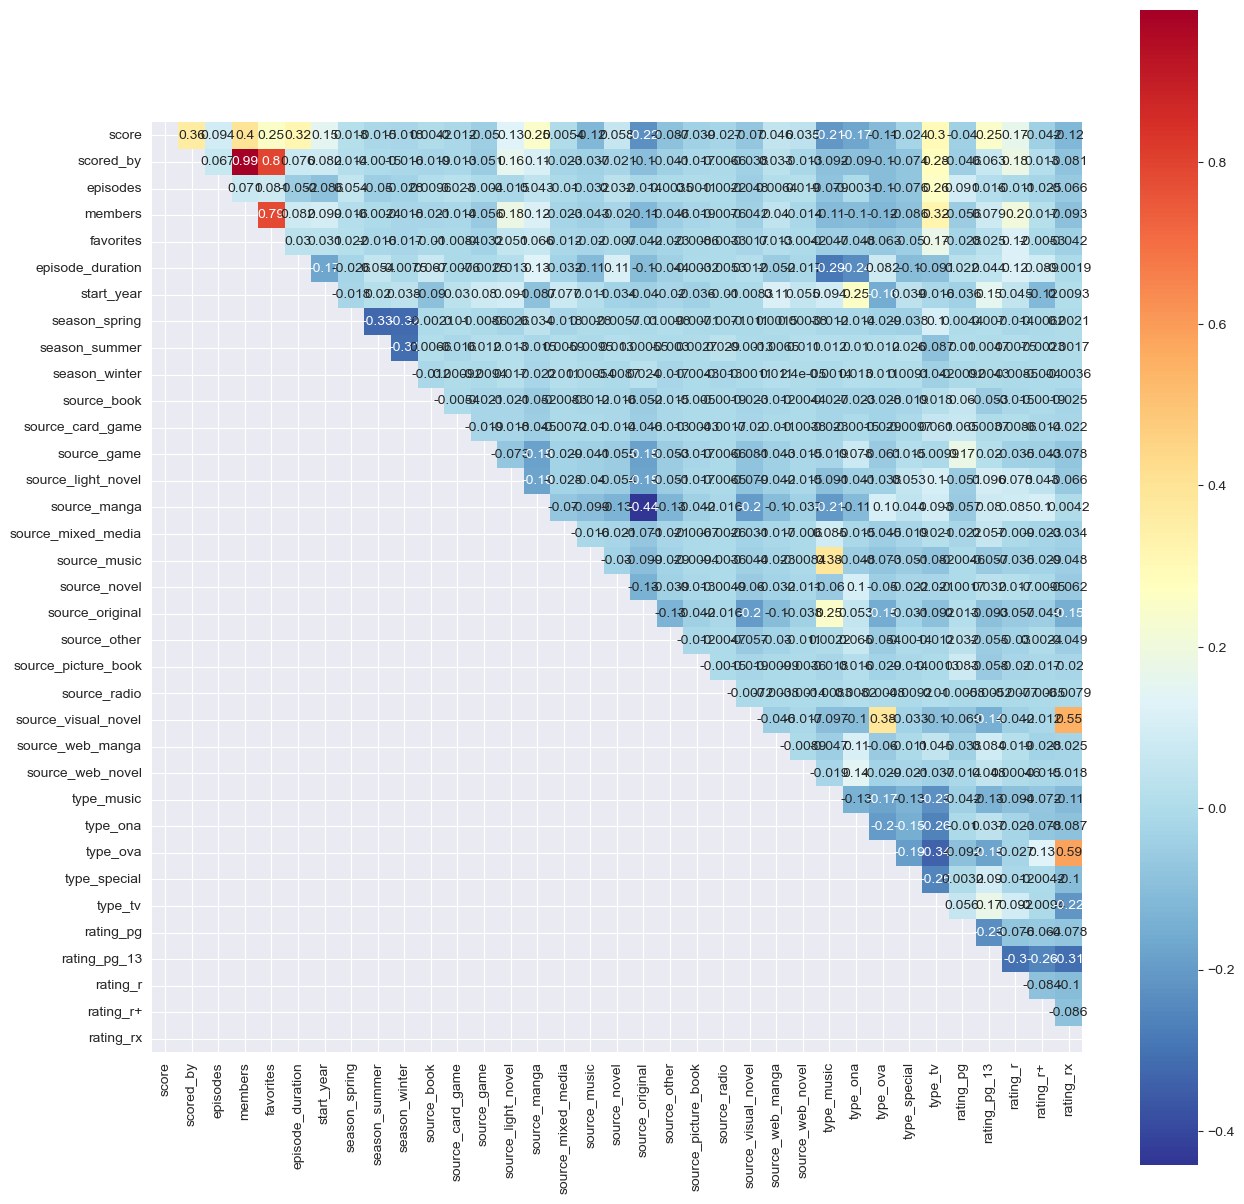

In [218]:
corrs = data.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool))
plt.figure(figsize=(15, 15))
sns.heatmap(upper_tri, cmap="RdYlBu_r", square=True, annot=True);

In [219]:
cols_to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
cols_to_drop

['members']

In [220]:
cutted_data = data.drop(columns=cols_to_drop)
cutted_data.head()

score  scored_by  episodes  favorites  episode_duration  start_year  \
0   9.10    2037075      64.0     219036         24.333333      2009.0   
1   9.04    1671587     148.0     202109         23.616667      2011.0   
2   9.05    1491491      10.0      55644         23.916667      2019.0   
3   9.07    1348232      24.0     184312         24.333333      2011.0   
4   8.94    1540277       1.0      84124        130.050000      2016.0   

   season_spring  season_summer  season_winter  source_book  ...  type_music  \
0           True          False          False        False  ...       False   
1          False          False          False        False  ...       False   
2           True          False          False        False  ...       False   
3           True          False          False        False  ...       False   
4          False           True          False        False  ...       False   

   type_ona  type_ova  type_special  type_tv  rating_pg  rating_pg_13  \
0     False     False         False     True      False         False   
1     False     False         False     True      False          True   
2     False     False         False     True      False         False   
3     False     False         False     True      False          True   
4     False     False         False    False      False          True   

   rating_r  rating_r+  rating_rx  
0      True      False      False  
1     False      False      False  
2      True      False      False  
3     False      False      False  
4     False      False      False  

[5 rows x 34 columns]

## Train-test split

In [221]:
X_train, X_test, y_train, y_test = train_test_split(
    cutted_data.drop(columns='score'),
    cutted_data['score'],
    random_state=2024,
    test_size=0.3
)

## Масштабирование

In [222]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns
)

## Baseline

In [223]:
dummy = DummyRegressor(strategy='median')
dummy.fit(X_train_scaled, y_train)
y_preds_dummy = dummy.predict(X_test_scaled)
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_preds_lr = lr.predict(X_test_scaled)

## Метрики задачи регрессии

In [224]:
print(f'RMSE for Dummy Regressor: {mean_squared_error(y_test, y_preds_dummy, squared=False)}')
print(f'RMSE for Linear regression: {mean_squared_error(y_test, y_preds_lr, squared=False)}')

RMSE for Dummy Regressor: 0.869993934037842
RMSE for Linear regression: 0.6809035838875881


In [225]:
print(f'MAE for Dummy Regressor: {mean_absolute_error(y_test, y_preds_dummy)}')
print(f'MAE for Linear regression: {mean_absolute_error(y_test, y_preds_lr)}')

MAE for Dummy Regressor: 0.6981394207167404
MAE for Linear regression: 0.5262107497631612


In [226]:
print(f'MAPE for Dummy Regressor: {mean_absolute_percentage_error(y_test, y_preds_dummy)}')
print(f'MAPE for Linear regression: {mean_absolute_percentage_error(y_test, y_preds_lr)}')

MAPE for Dummy Regressor: 0.11188957851578424
MAPE for Linear regression: 0.08434459594231546


In [227]:
def plot_model_results(actual, predicted, title):
  results = pd.DataFrame({'True': actual, 'Prediction': predicted})
  sns.lmplot(x='True', y='Prediction', data=results, fit_reg=False)
  d_line= np.arange(results.min().min(), results.max().max())
  plt.plot(d_line, d_line, color='red', linestyle='--')
  plt.title = title
  plt.grid()
  plt.show()

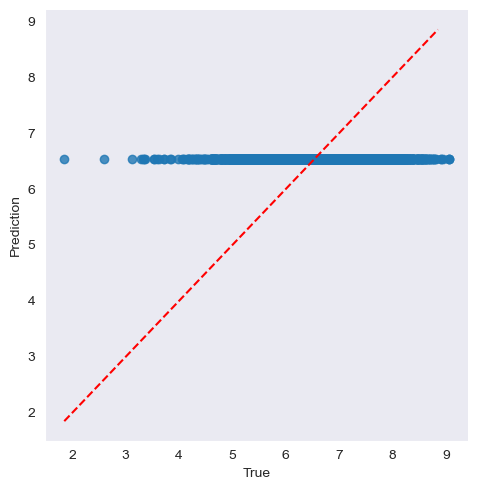

In [228]:
plot_model_results(y_test, y_preds_dummy, title='Dummy')

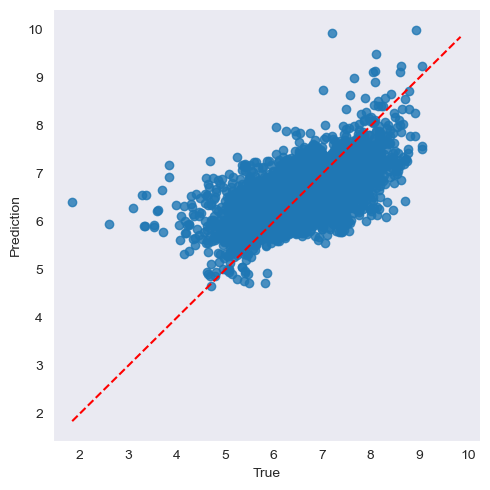

In [229]:
plot_model_results(y_test, y_preds_lr, title='Linear Regression')

# Task 2.1 Построить более сложную модель с подбором гиперпараметров – 10б

В рамках данной точки необходимо использовать более сложную модель для решения задачи, оптимизировать гиперпараметры и оценить ее качество.
Критерии оценки:
- Выбрана более сложная ML-модель - 1б.
- Произведен подбор гиперпараметров с использованием кросс-валидации - 4б.
- Выбранная модель обучена с лучшими подобранными значениями гиперпараметров - 4б.
- Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 1б.

## Бэггинг
### BaggingRegressor

In [230]:
bagging_model = BaggingRegressor(
    base_estimator=LinearRegression(),
    n_estimators=10,
    random_state=2024,
).fit(X_train_scaled, y_train)
y_preds_bm = bagging_model.predict(X_test_scaled)
print(f'MAPE for Bagging: {mean_absolute_percentage_error(y_test, y_preds_bm)}')

MAPE for Bagging: 0.08435530302514


### Случайный лес

In [231]:
rfr = RandomForestRegressor(random_state=2024)
rfr.fit(X_train_scaled, y_train)
y_preds_rf = rfr.predict(X_test_scaled)
print(f'MAPE for Random Forest: {mean_absolute_percentage_error(y_test, y_preds_rf)}')

MAPE for Random Forest: 0.056865342676466216


## Подбор гиперпараметров

In [232]:
parameters = {
    'n_estimators': np.arange(50, 160, 20),
    'max_depth': list(range(3, 11)) + [None],
    'random_state': [2024],
}
grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    n_jobs=2,
    verbose=1,
    cv=3,
)

In [233]:
%%time

grid_search.fit(X_train_scaled, y_train)

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Fitting 3 folds for each of 54 candidates, totalling 162 fits
max_depth: None
n_estimators: 150
random_state: 2024
CPU times: total: 10.3 s
Wall time: 2min 34s


In [234]:
y_preds_rfp = grid_search.best_estimator_.predict(X_test_scaled)
print(f'MAPE for Random Forest with parameters: {mean_absolute_percentage_error(y_test, y_preds_rfp)}')

MAPE for Random Forest with parameters: 0.05664732987953495


# Task 2.2 Проинтерпретировать полученную модель – 10б

В рамках данного пункта необходимо проинтерпретировать модель, полученную в предыдущем пункте.
Критерии оценки:
- Получена интерпретация построенной модели, включая визуализации (коэффициенты/значения перестановок/ форма и тд) - 5 б.
- Приведено экспертное мнение о полученной интерпретации (вы, как эксперт в предметной области, можете оценить адекватность признаков и решений, принимаемых моделью, и выразить свое мнение в 1-2 предложении) - 5 б.

## Mean Decrease Impurity

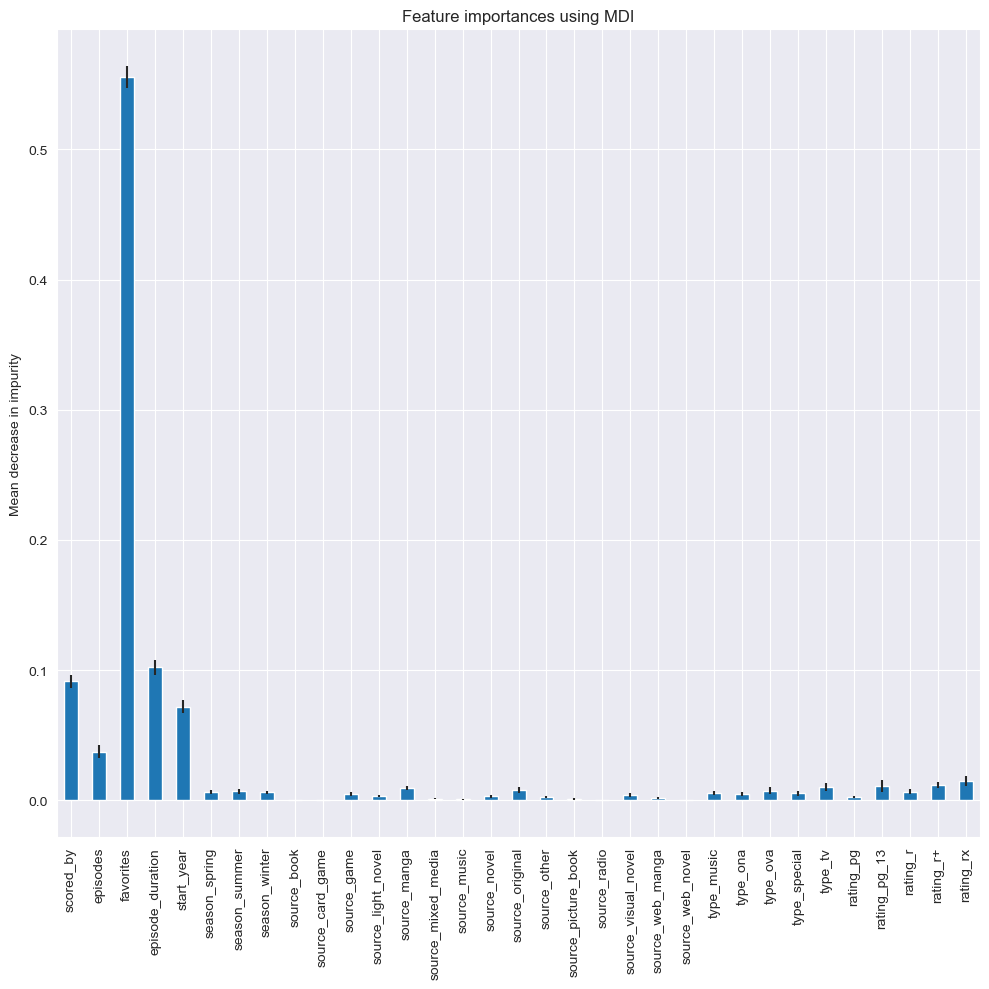

In [235]:
rf = grid_search.best_estimator_
forest_importances = pd.Series(rf.feature_importances_, index=X_train.columns)

fig, ax = plt.subplots(figsize=(10,10))
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity", )
fig.tight_layout()

## Permutation importances

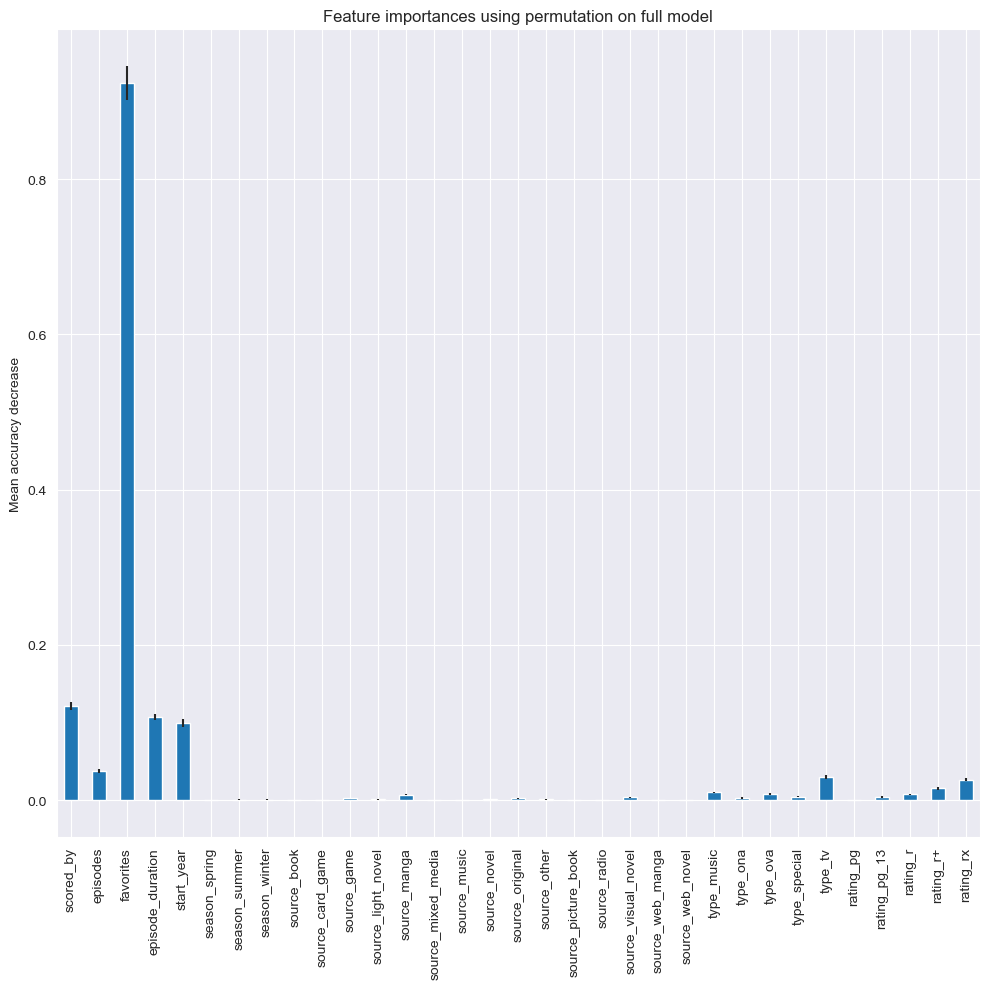

In [236]:
importances = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=2024, n_jobs=2)
forest_importances = pd.Series(importances.importances_mean, index=X_train.columns)

fig, ax = plt.subplots(figsize=(10,10))
forest_importances.plot.bar(yerr=importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

## SHAP

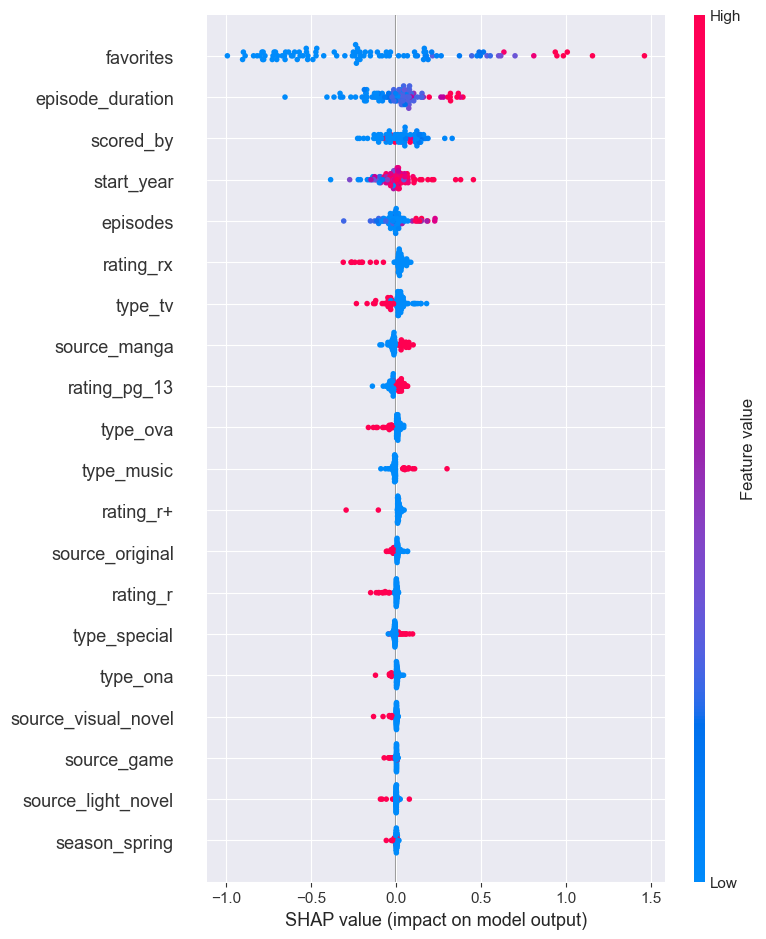

In [237]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train_scaled.iloc[:100])
shap.summary_plot(shap_values, X_train_scaled.iloc[:100])

Признак, оказывающий наиболее сильное влияние на предсказание модели - favourites.
Думаю, вполне логично, что по количеству человек, которые оценили title как "любимый" можно судить об оценке произведения.
Следующим по важности является episode_duration, который косвенно свидетельствует о типе title, что в свою очередь тоже влияет на оценку.
Также важен start_year, потому что современные работы как правило ппользуются большей популярностью и получают более высокие оценки.